# 训练模型--线性回归

## 标准方程

In [1]:
import numpy as np
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

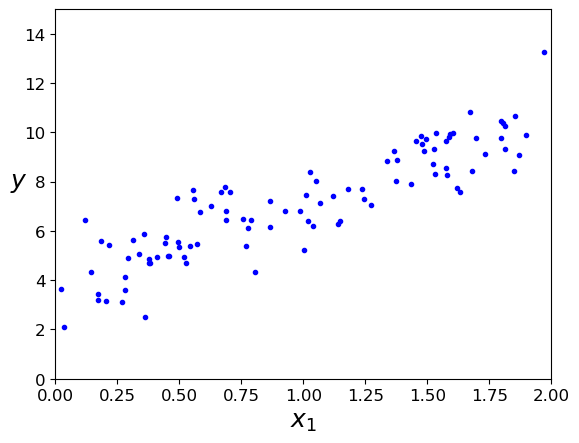

In [2]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
x_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [4]:
theta_best

array([[3.6979571 ],
       [3.46234818]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.6979571 ],
       [10.62265347]])

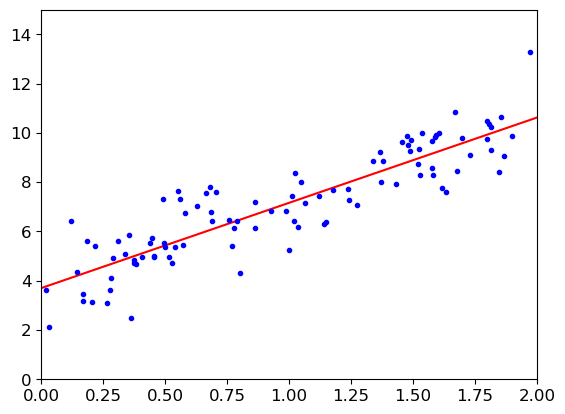

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [7]:
# 使用sklearn执行线性回归
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.6979571]), array([[3.46234818]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.6979571 ],
       [10.62265347]])

In [9]:
theta_best_svd, residuals, rank, s =np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd

array([[3.6979571 ],
       [3.46234818]])

In [10]:
np.linalg.pinv(x_b).dot(y)

array([[3.6979571 ],
       [3.46234818]])

# 梯度下降

## 批量梯度下降

In [11]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[3.6979571 ],
       [3.46234818]])

In [13]:
# 对比不同的学习率
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(x_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

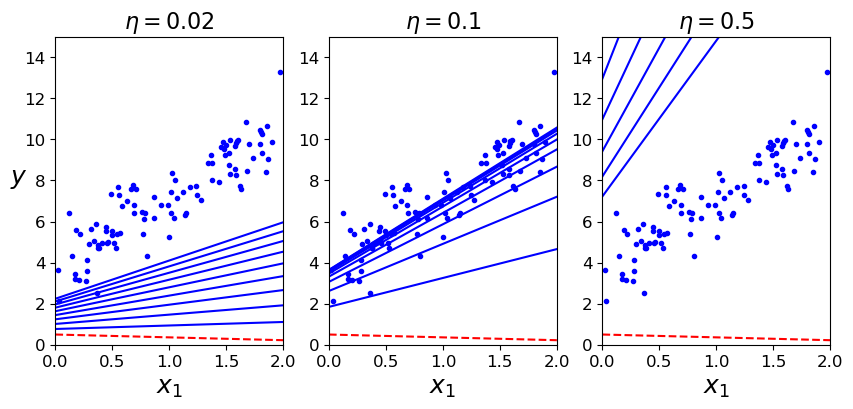

In [14]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

In [15]:
theta_path_bgd

[array([[1.84258047],
        [1.40741743]]),
 array([[2.61636383],
        [2.29512454]]),
 array([[3.06142515],
        [2.80478416]]),
 array([[3.3175954 ],
        [3.09723674]]),
 array([[3.46521921],
        [3.26489777]]),
 array([[3.55046145],
        [3.36086712]]),
 array([[3.59984799],
        [3.41565462]]),
 array([[3.62862042],
        [3.44679032]]),
 array([[3.64553665],
        [3.46434634]]),
 array([[3.65562916],
        [3.47410963]]),
 array([[3.66178984],
        [3.47940497]]),
 array([[3.66568065],
        [3.48214243]]),
 array([[3.66825683],
        [3.48341921]]),
 array([[3.67006756],
        [3.4838655 ]]),
 array([[3.67142868],
        [3.48384311]]),
 array([[3.67252197],
        [3.48355968]]),
 array([[3.67345215],
        [3.48313429]]),
 array([[3.67427965],
        [3.48263511]]),
 array([[3.67503948],
        [3.48210108]]),
 array([[3.675752  ],
        [3.48155434]]),
 array([[3.67642915],
        [3.48100742]]),
 array([[3.67707806],
        [3.4

## 随机梯度下降

In [16]:
# 简单学习率调度
n_epoch = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epoch):  # 循环执行多个训练周期
    for i in range(m):  # 对于每个样本进行梯度更新
        random_index = np.random.randint(m)  # 随机选择一个训练样本的索引
        xi = x_b[random_index:random_index+1]  # 选取对应的特征向量 (1x2) 带有偏置项
        yi = y[random_index:random_index+1]  # 选取对应的目标值 (1x1)
        
        # 计算当前样本的梯度，基于均方误差损失函数
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        
        # 根据自定义学习率调度器计算当前步长
        eta = learning_schedule(epoch * m + i)
        
        # 按照随机梯度下降更新参数
        theta = theta - eta * gradients

In [17]:
theta

array([[3.6949527 ],
       [3.48769152]])

In [18]:
# 使用sklearn
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [19]:
sgd_reg.intercept_,sgd_reg.coef_

(array([3.57828379]), array([3.38241665]))

## 小批量梯度下降

In [20]:
theta_path_mgd = []  # 用于存储每次迭代后 theta 的值，方便后续查看参数变化情况

n_iterations = 50  # 设置迭代次数
minibatch_size = 20  # 每次小批量随机梯度下降时选取的样本数

np.random.seed(42)  # 设置随机数种子，确保结果可重复
theta = np.random.randn(2, 1)  # 对参数 theta 进行随机初始化

# 学习率调度参数，t0 是初始学习率，t1 用于控制学习率衰减速度
t0, t1 = 200, 1000  
def learning_schedule(t):
    return t0 / (t + t1)  # 学习率随着 t 的增大而逐渐减小

t = 0  # 初始化步数
for epoch in range(n_iterations):  # 迭代执行多个训练周期
    shuffled_indices = np.random.permutation(m)  # 对数据的索引进行随机打乱
    X_b_shuffled = x_b[shuffled_indices]  # 按照打乱的顺序重排特征数据
    y_shuffled = y[shuffled_indices]  # 按照打乱的顺序重排目标值
    for i in range(0, m, minibatch_size):  # 以小批量为单位进行梯度下降
        t += 1  # 记录步数
        xi = X_b_shuffled[i:i+minibatch_size]  # 选取当前批次的小批量特征数据
        yi = y_shuffled[i:i+minibatch_size]  # 选取对应的小批量目标值
        # 计算当前小批量数据的梯度，基于均方误差的损失函数
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)  # 根据步数 t 动态调整学习率
        theta = theta - eta * gradients  # 按照随机梯度下降法更新参数 theta
        theta_path_mgd.append(theta)  # 保存更新后的 theta 值，方便后续分析


In [21]:
theta

array([[3.66247391],
       [3.45104735]])

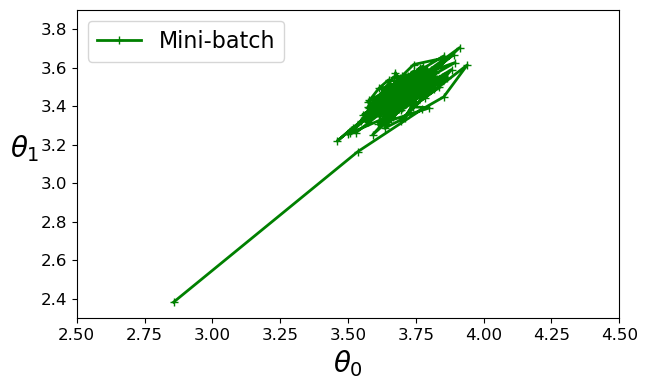

In [22]:
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

In [23]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

# 假设 x_b 是带有偏置项的训练数据，y 是目标值
# 例如：x_b = np.array([[1, 1], [1, 2], [1, 3], ...]), y = np.array([1, 2, 3, ...])

# 1. 标准化数据（对 SGD 来说是个好习惯）
scaler = StandardScaler()
x_b_scaled = scaler.fit_transform(x_b)

# 2. 初始化 SGDRegressor
sgd_reg = SGDRegressor(
    max_iter=1,               # 每次调用只进行一次迭代
    penalty=None,             # 不使用正则化
    eta0=0.01,                # 初始学习率
    learning_rate='constant', # 固定学习率
    warm_start=True           # 使得模型在每次调用 partial_fit 时继续训练
)

# 3. 保存每次迭代后 theta 的值
theta_path_mini_batch = []

n_iterations = 50  # 迭代次数
minibatch_size = 20  # 每个 mini-batch 的大小

np.random.seed(42)  # 设置随机种子

# SGDRegressor 需要 y 是一维数组，因此需要进行变形
y = y.ravel()

m = len(x_b)  # 样本数
for epoch in range(n_iterations):
    # 每个 epoch 开始时，打乱数据
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = x_b_scaled[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    # 4. 进行小批量训练
    for i in range(0, m, minibatch_size):
        xi = X_b_shuffled[i:i + minibatch_size]  # 提取一个小批量的特征
        yi = y_shuffled[i:i + minibatch_size]    # 提取对应的小批量目标值
        
        # 5. 调用 partial_fit 进行模型更新
        sgd_reg.partial_fit(xi, yi)
        
        # 6. 保存当前的 theta 参数
        theta_path_mini_batch.append(sgd_reg.coef_.copy())

# 打印最终模型的参数 theta
print("Final theta:", sgd_reg.coef_)


Final theta: [0.         1.94001142]


# 多项式回归

In [24]:
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

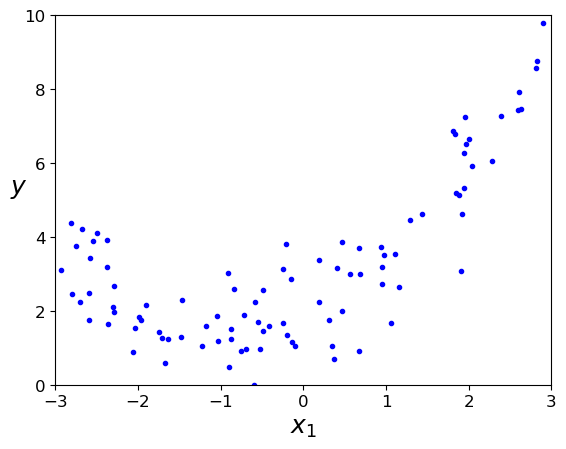

In [25]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures
# 1. 生成多项式特征 (degree=2 表示生成二次项)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
# 将原始特征 X 转换为二次多项式特征
X_poly = poly_features.fit_transform(X)
X[0]

array([2.3903188])

In [31]:
X_poly[0]

array([2.3903188 , 5.71362396])

In [32]:
# 2. 创建线性回归模型
lin_reg = LinearRegression()
# 3. 使用转换后的多项式特征拟合线性回归模型
lin_reg.fit(X_poly, y)

# 输出模型的截距和系数
print(lin_reg.intercept_, lin_reg.coef_)

[1.74329611] [[1.01530465 0.56610918]]


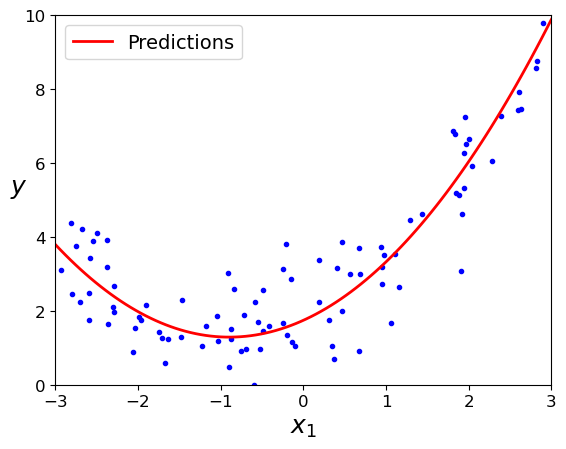

In [33]:
# 4. 生成用于绘制曲线的新数据点 (从 -3 到 3 之间均匀分布的 100 个点)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
# 将新生成的数据转换为多项式特征 (与拟合时保持一致)
X_new_poly = poly_features.transform(X_new)
# 5. 通过模型对新数据点进行预测，得到相应的 y 值
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# 学习曲线

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # 1. 将数据集划分为训练集和验证集，test_size=0.2 表示 20% 的数据用于验证
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    # 2. 初始化用于存储训练误差和验证误差的列表
    train_errors, val_errors = [], []
    # 3. 对训练集从 1 到 len(X_train) 进行迭代，以不同的训练集大小进行模型训练
    for m in range(1, len(X_train)):
        # 使用前 m 个样本拟合模型
        model.fit(X_train[:m], y_train[:m])
        # 对训练集的前 m 个样本进行预测
        y_train_predict = model.predict(X_train[:m])
        # 对验证集进行预测
        y_val_predict = model.predict(X_val)
        # 计算训练误差（使用前 m 个样本的预测结果和真实标签）
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        # 计算验证误差（使用整个验证集的预测结果和真实标签）
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    # 4. 绘制学习曲线
    # 用红色 "+-" 曲线表示训练误差的平方根（即 RMSE）
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    # 用蓝色实线表示验证误差的平方根（即 RMSE）
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    # 5. 设置图例，显示不同曲线的标签
    plt.legend(loc="upper right", fontsize=14)
    # 6. 设置 x 轴标签为 "Training set size"
    plt.xlabel("Training set size", fontsize=14)
    # 7. 设置 y 轴标签为 "RMSE"（Root Mean Squared Error，均方根误差）
    plt.ylabel("RMSE", fontsize=14)

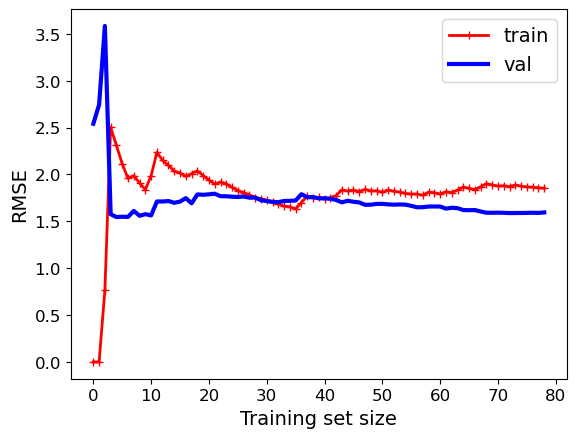

In [63]:
lin_reg = LinearRegression()
polt_learning_curves(lin_reg, X, y)

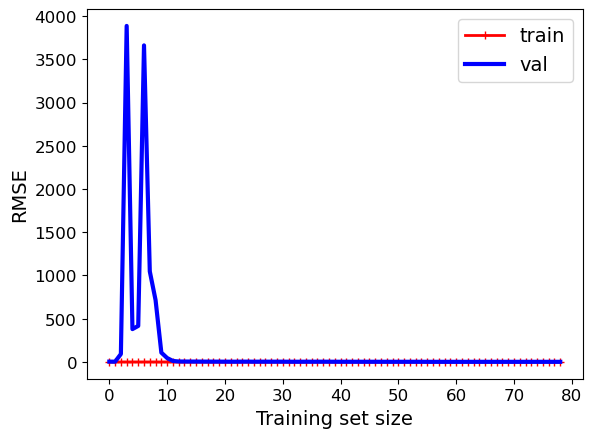

In [160]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X,y)

# 正则化线性模型

## 岭回归

In [169]:
from sklearn.linear_model import Ridge, SGDRegressor

# 1. 创建 Ridge 回归模型对象，设置正则化参数 alpha=1，使用 Cholesky 分解求解
ridge_reg = Ridge(alpha=1, solver="cholesky")
# 使用训练数据 X 和 y 拟合 Ridge 回归模型
ridge_reg.fit(X, y)
# 使用训练好的 Ridge 模型对新数据点 [1.5] 进行预测
ridge_pred = ridge_reg.predict([[1.5]])
print(f"Ridge Regression Prediction for 1.5: {ridge_pred}")

Ridge Regression Prediction for 1.5: [[4.81911901]]


In [170]:
# 2. 创建随机梯度下降回归模型对象，使用 L2 正则化（相当于岭回归），penalty="l2"
sgd_reg = SGDRegressor(penalty="l2")
# 将目标值 y 转换为一维数组，适用于 SGDRegressor
sgd_reg.fit(X, y.ravel())
# 使用训练好的 SGD 模型对新数据点 [1.5] 进行预测
sgd_pred = sgd_reg.predict([[1.5]])
print(f"SGD Regression Prediction for 1.5: {sgd_pred}")

SGD Regression Prediction for 1.5: [4.80014577]


# Lasso回归

In [172]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.76683773])

In [173]:
sgd_reg = SGDRegressor(penalty="l1")
sgd_reg.fit(X,y)
sgd_reg.predict([[1.5]])

c:\Users\89556\.conda\envs\pydata\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.78640241])

# 弹性网络

In [174]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([4.76902119])

# 提前停止

In [187]:
from sklearn.base import clone

# 准备数据
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=1e-4, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

c:\Users\89556\.conda\envs\pydata\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\89556\.conda\envs\pydata\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\89556\.conda\envs\pydata\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\89556\.conda\envs\pydata\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_it

In [188]:
best_epoch

90

In [189]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=0.0001, warm_start=True)